Primeiras linhas do conjunto de dados:
  Estado   Ano  Preco_Diesel  PIB_Agropecuario  Num_Fazendas  \
0     SP  2018          4.81            143.10          5691   
1     SP  2019          3.70            131.26          8822   
2     SP  2020          6.89            126.54          7449   
3     SP  2021          4.56             83.47          9166   
4     SP  2022          4.90             16.53          3247   

   Concorrentes_Vendas  Ram3500_Vendas  
0                 1144              64  
1                 1432              76  
2                  485              61  
3                 1182              56  
4                 1075              13  


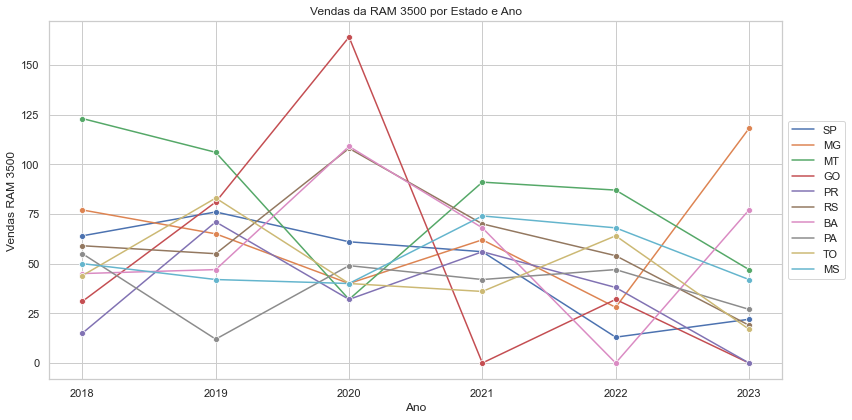

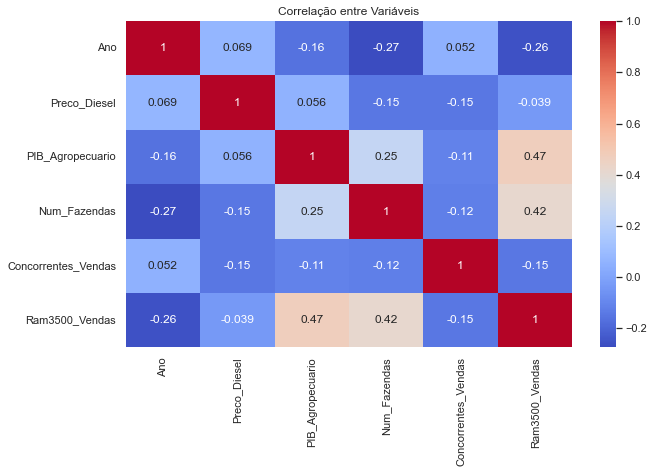

MAE (Erro Médio Absoluto): 19.48
R² (Coeficiente de Determinação): 0.04


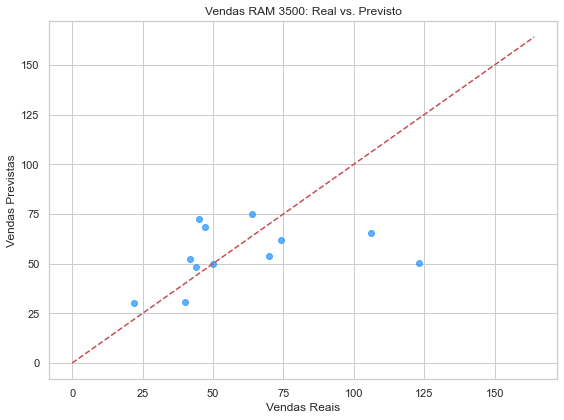

In [3]:
# Previsão de Vendas da RAM 3500 no Brasil

# Etapa 1: Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Etapa 2: Gerar dados fictícios de vendas da RAM 3500 no Brasil
np.random.seed(42)

estados = ['SP', 'MG', 'MT', 'GO', 'PR', 'RS', 'BA', 'PA', 'TO', 'MS']
anos = list(range(2018, 2024))
dados = []

for estado in estados:
    for ano in anos:
        preco_diesel = round(np.random.uniform(3.5, 7.0), 2)
        pib_agro = round(np.random.uniform(10, 150), 2)
        num_fazendas = np.random.randint(500, 10000)
        concorrentes_vendas = np.random.randint(100, 1500)
        vendas_ram = int(
            (0.5 * num_fazendas / 100) +
            (0.3 * pib_agro) +
            np.random.normal(0, 30)
        )
        vendas_ram = max(vendas_ram, 0)  # Evita valores negativos
        dados.append([estado, ano, preco_diesel, pib_agro, num_fazendas, concorrentes_vendas, vendas_ram])

# Criar o DataFrame
df = pd.DataFrame(dados, columns=[
    'Estado', 'Ano', 'Preco_Diesel', 'PIB_Agropecuario',
    'Num_Fazendas', 'Concorrentes_Vendas', 'Ram3500_Vendas'
])

# Etapa 3: Análise exploratória
print("Primeiras linhas do conjunto de dados:")
print(df.head())

# Gráfico de vendas por ano e estado
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Ano', y='Ram3500_Vendas', hue='Estado', marker='o')
plt.title("Vendas da RAM 3500 por Estado e Ano")
plt.ylabel("Vendas RAM 3500")
plt.xlabel("Ano")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Etapa 4: Correlação entre variáveis
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre Variáveis")
plt.show()

# Etapa 5: Modelo de regressão
X = df[['Preco_Diesel', 'PIB_Agropecuario', 'Num_Fazendas', 'Concorrentes_Vendas']]
y = df['Ram3500_Vendas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

# Etapa 6: Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Erro Médio Absoluto): {mae:.2f}")
print(f"R² (Coeficiente de Determinação): {r2:.2f}")

# Etapa 7: Visualização - Real vs Previsto
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Vendas Reais")
plt.ylabel("Vendas Previstas")
plt.title("Vendas RAM 3500: Real vs. Previsto")
plt.grid(True)
plt.tight_layout()
plt.show()